In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file, nrows=100000)
fares = pd.read_csv(trip_fare_file, nrows=100000)

In [3]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()

In [4]:
full_tripdata.columns

Index([u'medallion', u' hack_license', u' vendor_id', u' rate_code',
       u' store_and_fwd_flag', u' pickup_datetime', u' dropoff_datetime',
       u' passenger_count', u' trip_time_in_secs', u' trip_distance',
       u' pickup_longitude', u' pickup_latitude', u' dropoff_longitude',
       u' dropoff_latitude', u' payment_type', u' fare_amount', u' surcharge',
       u' mta_tax', u' tip_amount', u' tolls_amount', u' total_amount'],
      dtype='object')

# Prepare Time

In [5]:
full_tripdata[" pickup_datetime"] = pd.to_datetime(full_tripdata[" pickup_datetime"])
full_tripdata[" dropoff_datetime"] = pd.to_datetime(full_tripdata[" dropoff_datetime"])

full_tripdata["weekday"] = full_tripdata[" pickup_datetime"].dt.dayofweek
full_tripdata["hourofday"] = full_tripdata[" pickup_datetime"].dt.hour

In [6]:
import seaborn as sns

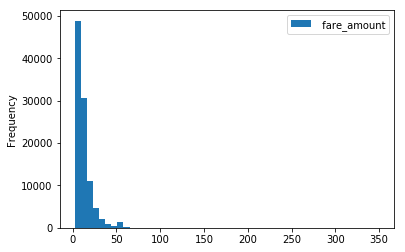

In [7]:
full_tripdata[[" fare_amount"]].plot.hist(bins=50)

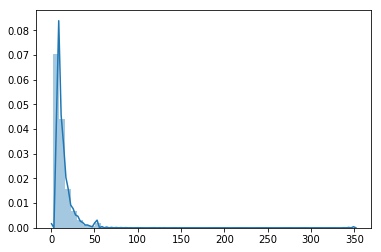

In [8]:
sns.distplot(full_tripdata[[" fare_amount"]],norm_hist=True)

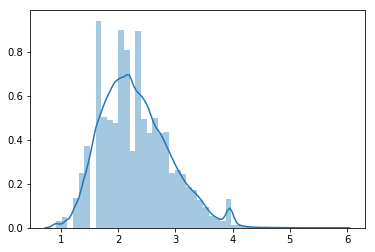

In [9]:
full_tripdata["log_fare_amount"] = np.log(full_tripdata[" fare_amount"])
#full_tripdata[["log_fare_amount"]].plot.hist(bins=50)
sns.distplot(full_tripdata[["log_fare_amount"]],norm_hist=True)

In [10]:
full_tripdata = full_tripdata.drop(columns=['medallion',' hack_license',' vendor_id',' rate_code',' store_and_fwd_flag'])

In [11]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday', u'log_fare_amount'],
      dtype='object')

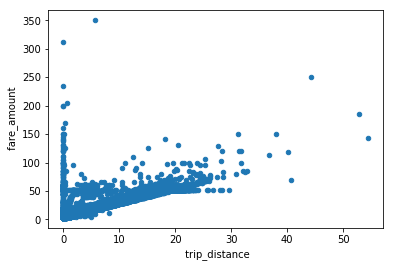

In [12]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

In [13]:
#check data whose trip distance is 0 

zero_distance = full_tripdata.loc[(full_tripdata[' trip_distance'] == 0)]

zero_distance.describe()

,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,weekday,hourofday,log_fare_amount
count,519.000000,519.000000,519.0,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.00000,519.000000,519.000000,519.000000,519.000000
mean,1.672447,54.799615,0.0,-27.509753,15.150136,-20.381795,11.226694,31.753815,0.117534,0.348748,4.664489,0.59341,37.477996,4.805395,6.965318,2.719545
std,1.287238,288.258100,0.0,35.787883,19.709080,33.081366,18.222061,36.540877,0.229699,0.229893,8.067769,2.20211,41.264243,0.405905,7.841501,1.336390
min,1.000000,0.000000,0.0,-74.185577,0.000000,-74.185577,0.000000,2.500000,0.000000,0.000000,0.000000,0.00000,3.000000,4.000000,0.000000,0.916291
25%,1.000000,0.000000,0.0,-73.977234,0.000000,-73.869377,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000,6.625000,5.000000,1.000000,1.098612
50%,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.500000,1.000000,0.00000,21.300000,5.000000,4.000000,2.890372
75%,2.000000,0.000000,0.0,0.000000,40.728313,0.000000,40.680047,52.000000,0.000000,0.500000,7.000000,0.00000,62.250000,5.000000,8.000000,3.951244
max,6.000000,3600.000000,0.0,0.000000,41.097832,0.000000,41.097855,312.000000,1.000000,0.500000,78.000000,17.00000,347.500000,6.000000,23.000000,5.743003


In [14]:
columnName = ' trip_distance'
print full_tripdata[columnName].describe()

#full_tripdata.astype(bool).sum(axis=0)

count    100000.000000
mean          3.092583
std           3.197229
min           0.000000
25%           1.150000
50%           2.050000
75%           3.790000
max          54.380000
Name:  trip_distance, dtype: float64


# Remove trips whose trip_time, trip_distance, hour, weekday, coordinates is 0

In [15]:
full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] != 0) & (full_tripdata[' pickup_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0)]
#full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] > -72.0) & (full_tripdata[' pickup_latitude'] < 30.0) & (full_tripdata[' dropoff_latitude'] > -72.0) & (full_tripdata[' dropoff_latitude'] < 30.0)]

full_tripdata = full_tripdata.loc[(full_tripdata[' trip_distance'] != 0) & (full_tripdata[' trip_time_in_secs'] != 0)]

full_tripdata = full_tripdata.loc[(full_tripdata['weekday'] != 0) & (full_tripdata['hourofday'] != 0)]

In [16]:
#remove dirty data of coordinates
full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] < -72.0) 
                                   #& (full_tripdata[' pickup_latitude'] > 30.0) 
                                   #& (full_tripdata[' dropoff_latitude'] < -72.0) 
                                   & (full_tripdata[' dropoff_latitude'] > 30.0)]


# Correlation between trip distance and tip amount

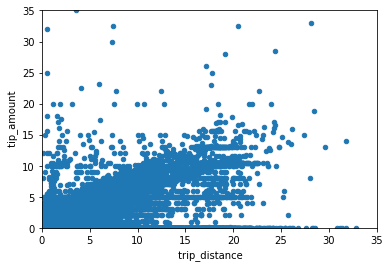

In [17]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount',ylim=(0,35),xlim=(0,35))

# Correlation between trip time and tip amount

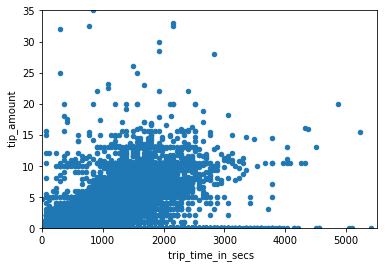

In [18]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount',ylim=(0,35),xlim=(0,5500))

# Correlation between trip distance and fare amount

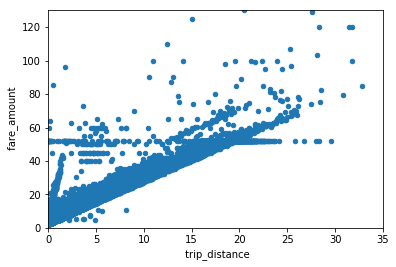

In [19]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount',ylim=(0,130),xlim=(0,35))

# Correlation between trip time and fare amount

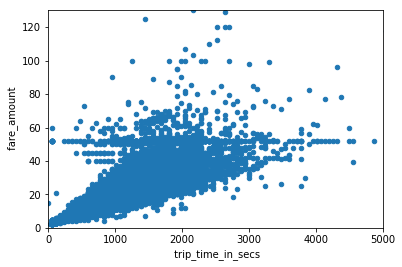

In [20]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount',ylim=(0,130),xlim=(0,5000))

# Relationship with categorical features

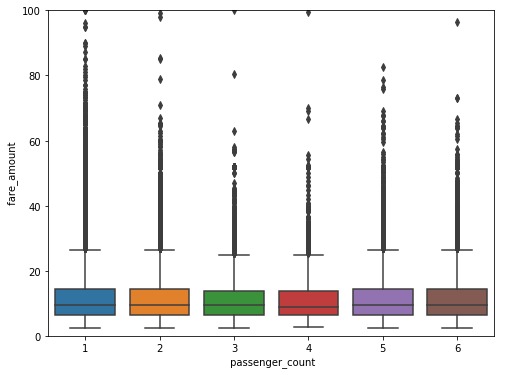

In [21]:

columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=100);

# Conclusion , passenger_count has no correlation with fare_amount

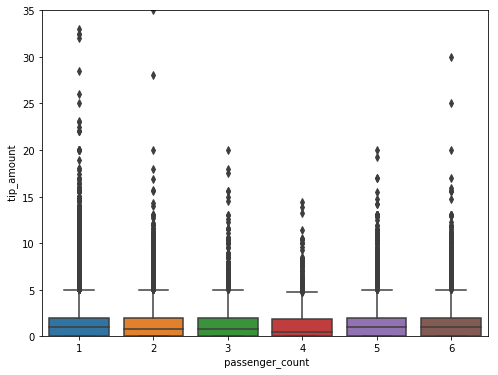

In [22]:
columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Conclusion , passenger_count has no correlation with tip_amount

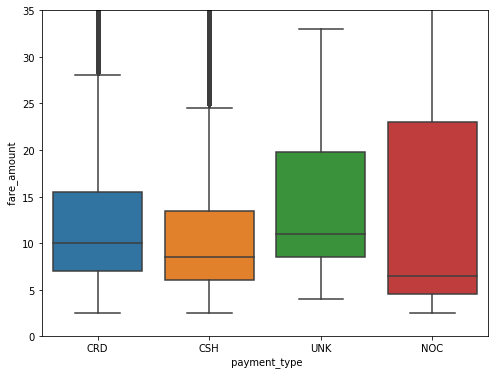

In [23]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Conclusion , payment_tyep has some correlation with fare_amount, UNK is more frequently used for higher fare amount

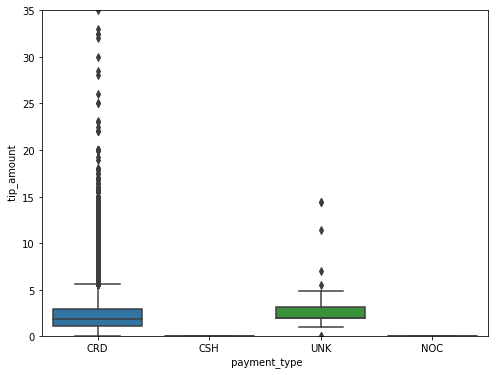

In [24]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# People are more willing to give tip when using card or "UNK"

In [25]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday', u'log_fare_amount'],
      dtype='object')

# Correlation between weekday and fare amount

count    83330.000000
mean         4.557566
std          0.506227
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: weekday, dtype: float64


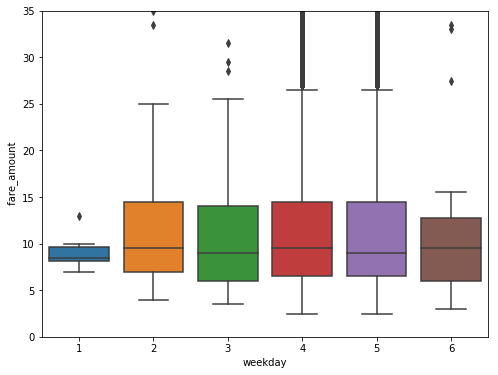

In [26]:
columnName = 'weekday'
print full_tripdata[columnName].describe()
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Correlation between weekday and tip amount

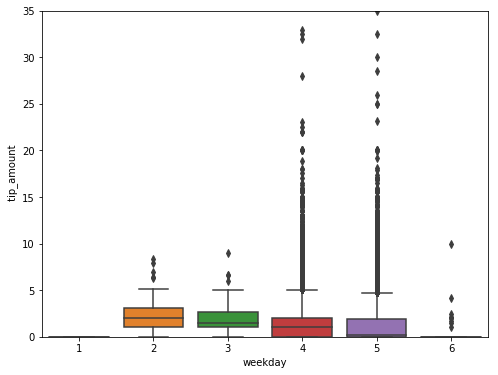

In [27]:
columnName = 'weekday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Correlation between hour of the day and fare amount

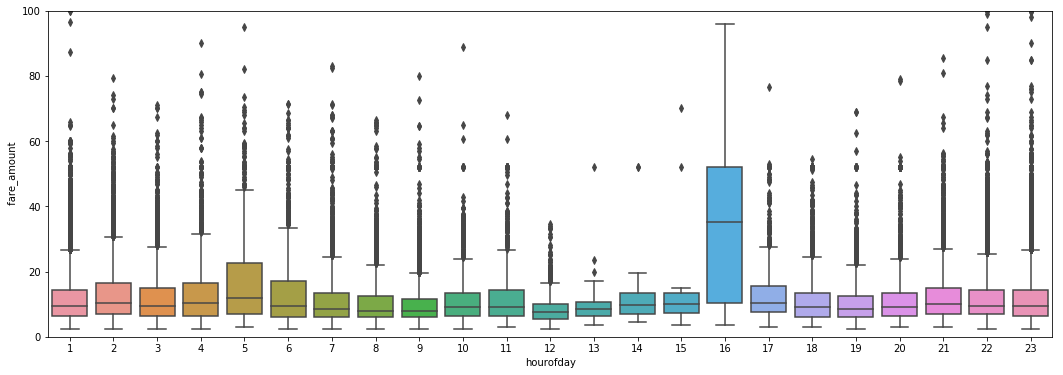

In [28]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=100);

# Correlation between hour of the day and fare amount

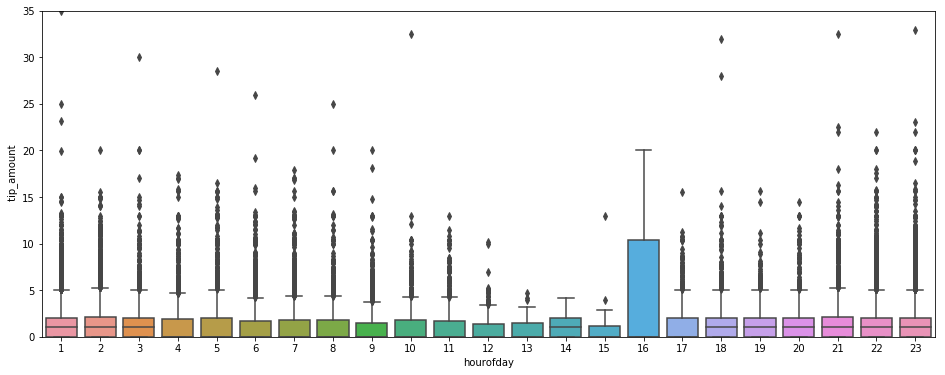

In [29]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(16, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Correlation matrix

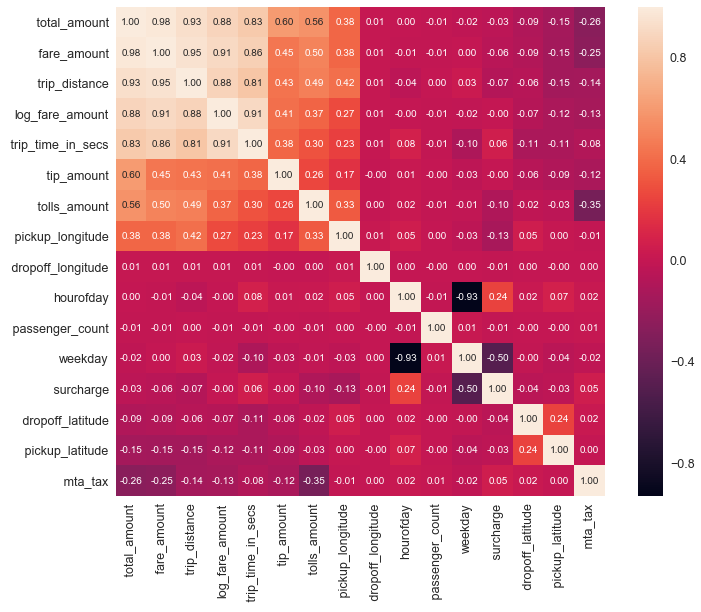

In [30]:
corrmat = full_tripdata.corr()

k = 18
cols = corrmat.nlargest(k, ' total_amount')[' total_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Process Coordinates 

In [31]:
import pickle
from sklearn.cluster import KMeans

kmeammodel = pickle.load(open('location_cluster_kmean', 'rb'))

In [32]:
pickupLocations = full_tripdata.iloc[:,5:7]


In [33]:
full_tripdata["pickupLoc"] = kmeammodel.predict(pickupLocations.as_matrix())

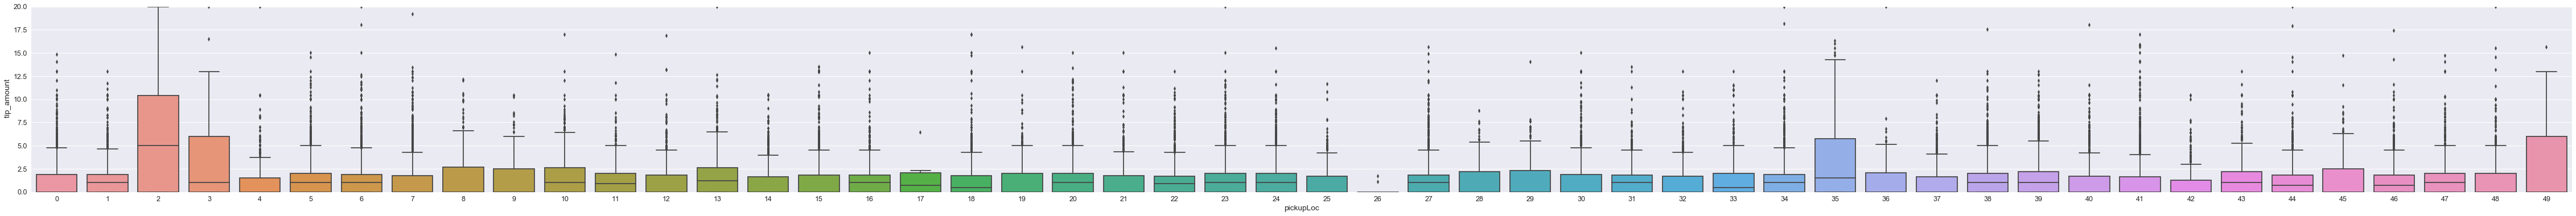

In [34]:
columnName = 'pickupLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=20);

In [35]:
dropoffLocations = full_tripdata.iloc[:,7:9]
print dropoffLocations.columns
full_tripdata["dropoffLoc"] = kmeammodel.predict(dropoffLocations.as_matrix())

Index([u' dropoff_longitude', u' dropoff_latitude'], dtype='object')


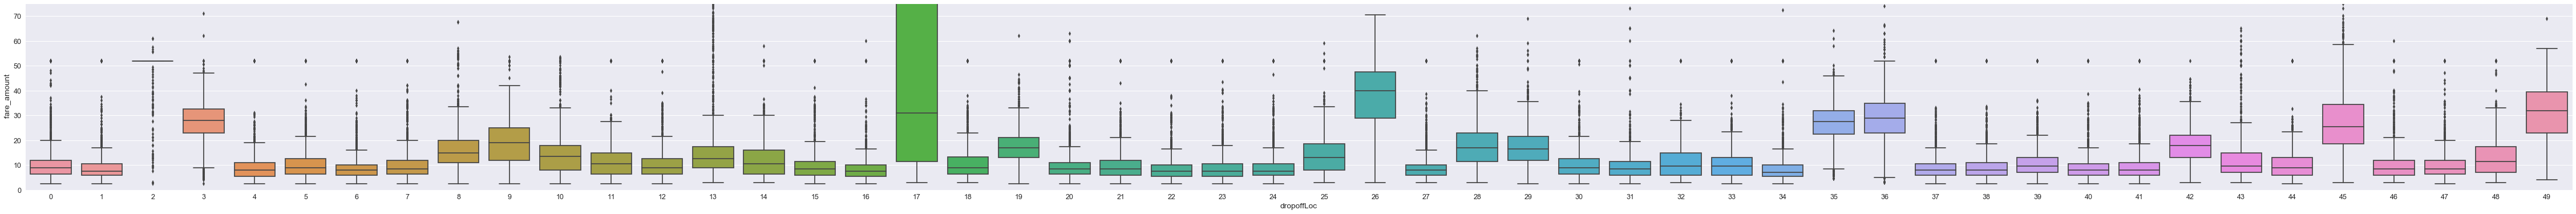

In [36]:
columnName = 'dropoffLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=75);

In [37]:
training = full_tripdata.drop(columns=[' pickup_datetime',
                                       ' dropoff_datetime',
                                       ' trip_time_in_secs',
                                       ' trip_distance',
                                       ' dropoff_longitude',
                                       ' dropoff_latitude',
                                       ' surcharge',
                                       ' mta_tax',
                                       ' tolls_amount',
                                       ' total_amount',
                                       ' passenger_count',
                                       ' payment_type',
                                       ' pickup_longitude',
                                       ' pickup_latitude'])

# Correlation matrix with only fare , tip , locations, weekday and hourofday

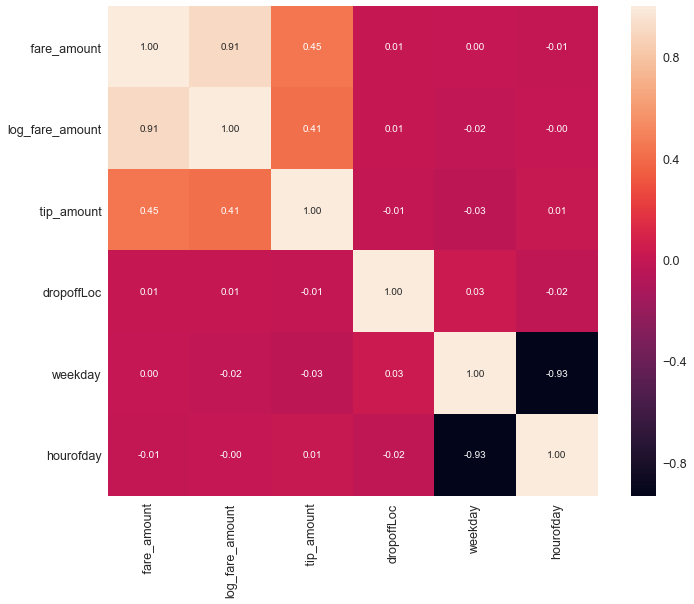

In [38]:
corrmat = training.corr()

k = 6
cols = corrmat.nlargest(k, ' fare_amount')[' fare_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [39]:
training['weekday'] = training['weekday'].astype('category')
training['hourofday'] = training['hourofday'].astype('category')
training['pickupLoc'] = training['pickupLoc'].astype('category')
training['dropoffLoc'] = training['dropoffLoc'].astype('category')

In [42]:
data = pd.concat([full_tripdata[' fare_amount'], full_tripdata["pickupLoc"], full_tripdata["dropoffLoc"]],axis=1)

data.groupby(by=['pickupLoc','dropoffLoc']).count().sort_values(by=[" fare_amount"],ascending=False).head()


fare_amount
pickupLoc dropoffLoc              
10        10                   610
          28                   318
14        48                   279
7         46                   255
39        38                   253

# h. Which trip has the highest standard deviation of travel time?

In [43]:
trips = full_tripdata.copy()

In [44]:
trips.groupby(by=[' pickup_longitude',' pickup_latitude',' dropoff_longitude',' dropoff_latitude']).count().sort_values(by=[" trip_time_in_secs"],ascending=False).head()

,,,,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,weekday,hourofday,log_fare_amount,pickupLoc,dropoffLoc
pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,,,,,,,,,,,,,,,,,
-73.980713,40.738091,-73.980713,40.738091,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
-73.995308,40.715782,-73.995308,40.715782,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
-73.960526,40.759113,-73.960526,40.759113,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
-73.991653,40.731205,-73.991653,40.731205,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
-73.970238,40.796665,-73.970238,40.796665,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


# Only looking at coordinates cannot take into account of very close pick up and drop off locations

In [45]:
training["trip_time_in_secs"] = full_tripdata.iloc[:,3]
training["trip_distance"] = full_tripdata.iloc[:,4]

In [46]:
training.groupby(by=['pickupLoc','dropoffLoc']).count().sort_values(by=["trip_time_in_secs"],ascending=False).head()

fare_amount   tip_amount  weekday  hourofday  \
pickupLoc dropoffLoc                                                  
10        10                 610.0        610.0    610.0      610.0   
          28                 318.0        318.0    318.0      318.0   
14        48                 279.0        279.0    279.0      279.0   
7         46                 255.0        255.0    255.0      255.0   
39        38                 253.0        253.0    253.0      253.0   

                      log_fare_amount  trip_time_in_secs  trip_distance  
pickupLoc dropoffLoc                                                     
10        10                    610.0              610.0          610.0  
          28                    318.0              318.0          318.0  
14        48                    279.0              279.0          279.0  
7         46                    255.0              255.0          255.0  
39        38                    253.0              253.0          253.0

In [47]:
training.groupby(by=['pickupLoc','dropoffLoc']).std().sort_values(by=["trip_time_in_secs"],ascending=False).head()

,,fare_amount,tip_amount,log_fare_amount,trip_time_in_secs,trip_distance
pickupLoc,dropoffLoc,,,,,
24,49,8.108637,4.868265,0.194390,2617.884642,2.609693
48,49,7.424621,14.142136,0.159488,2248.599564,2.701148
42,2,5.883795,4.656128,0.131854,1725.257745,1.722479
34,2,10.818580,6.152723,0.168139,1651.217732,2.494480
22,2,0.000000,5.081245,0.000000,1469.227202,0.851469


In [48]:
biggestdeviationTrips = training.loc[(training['pickupLoc'] == 24) & (training['dropoffLoc'] == 49)]
biggestdeviationTrips

,fare_amount,tip_amount,weekday,hourofday,log_fare_amount,pickupLoc,dropoffLoc,trip_time_in_secs,trip_distance
2617,52.0,13.0,4,15,3.951244,24,49,7500,17.45
40280,32.5,4.0,5,2,3.481240,24,49,1200,11.39
45420,37.0,6.0,4,23,3.610918,24,49,1500,12.71
60639,42.0,8.5,5,1,3.737670,24,49,1800,14.37
63425,49.0,0.0,4,21,3.891820,24,49,2460,16.88


In [49]:
biggestdeviationTrips = full_tripdata.loc[(full_tripdata['pickupLoc'] == 24) & (full_tripdata['dropoffLoc'] == 49)]
biggestdeviationTrips

,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,...,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,weekday,hourofday,log_fare_amount,pickupLoc,dropoffLoc
2617,2013-04-12 15:59:00,2013-04-12 18:04:00,5,7500,17.45,-74.000427,40.730633,-73.806915,40.653400,CRD,...,0.0,0.5,13.0,5.33,70.83,4,15,3.951244,24,49
40280,2013-04-13 02:26:00,2013-04-13 02:46:00,1,1200,11.39,-73.999611,40.726646,-73.838852,40.719383,CRD,...,0.5,0.5,4.0,0.00,37.50,5,2,3.481240,24,49
45420,2013-04-12 23:04:00,2013-04-12 23:29:00,1,1500,12.71,-74.003296,40.727573,-73.814545,40.714252,CRD,...,0.5,0.5,6.0,0.00,44.00,4,23,3.610918,24,49
60639,2013-04-13 01:20:00,2013-04-13 01:50:00,2,1800,14.37,-74.000328,40.728924,-73.812515,40.692932,CRD,...,0.5,0.5,8.5,0.00,51.50,5,1,3.737670,24,49
63425,2013-04-12 21:37:00,2013-04-12 22:18:00,2,2460,16.88,-74.001106,40.731503,-73.829872,40.680096,CSH,...,0.5,0.5,0.0,0.00,50.00,4,21,3.891820,24,49


# i. Which trip has most consistent fares?

In [50]:
training.groupby(by=['pickupLoc','dropoffLoc']).std().sort_values(by=[" fare_amount"]).head(10)

,,fare_amount,tip_amount,log_fare_amount,trip_time_in_secs,trip_distance
pickupLoc,dropoffLoc,,,,,
2,23,0.0,5.437541,0.0,223.120723,0.412193
14,2,0.0,3.756594,0.0,152.970585,0.261572
9,2,0.0,6.004443,0.0,60.000000,0.304357
36,39,0.0,1.060660,0.0,212.132034,0.424264
37,2,0.0,5.306600,0.0,590.786401,1.755484
46,2,0.0,5.773503,0.0,676.165660,1.232896
20,2,0.0,5.042321,0.0,535.038503,0.534836
16,2,0.0,4.785295,0.0,128.285396,0.737202
2,16,0.0,3.761055,0.0,159.552947,5.603197


In [51]:
fare_std = training.groupby(by=['pickupLoc','dropoffLoc']).std().sort_values(by=[" fare_amount"])
fare_std = fare_std.loc[fare_std[" fare_amount"] == 0]
print fare_std.describe()
fare_std

        fare_amount   tip_amount  log_fare_amount  trip_time_in_secs  \
count          43.0    43.000000             43.0          43.000000   
mean            0.0     4.844398              0.0         368.694055   
std             0.0     1.289699              0.0         319.642623   
min             0.0     0.000000              0.0          42.426407   
25%             0.0     4.434984              0.0         150.731505   
50%             0.0     5.092011              0.0         295.683228   
75%             0.0     5.612833              0.0         447.410657   
max             0.0     7.071068              0.0        1469.227202   

       trip_distance  
count      43.000000  
mean        1.449892  
std         1.635702  
min         0.106066  
25%         0.427608  
50%         0.870485  
75%         1.579574  
max         7.424730  


,,fare_amount,tip_amount,log_fare_amount,trip_time_in_secs,trip_distance
pickupLoc,dropoffLoc,,,,,
2,23,0.0,5.437541,0.0,223.120723,0.412193
14,2,0.0,3.756594,0.0,152.970585,0.261572
9,2,0.0,6.004443,0.0,60.000000,0.304357
36,39,0.0,1.060660,0.0,212.132034,0.424264
37,2,0.0,5.306600,0.0,590.786401,1.755484
46,2,0.0,5.773503,0.0,676.165660,1.232896
20,2,0.0,5.042321,0.0,535.038503,0.534836
16,2,0.0,4.785295,0.0,128.285396,0.737202
2,16,0.0,3.761055,0.0,159.552947,5.603197


In [52]:
biggestdeviationTrips = full_tripdata.loc[(full_tripdata['pickupLoc'] == 2) & (full_tripdata['dropoffLoc'] == 16)]
biggestdeviationTrips

,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,...,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,weekday,hourofday,log_fare_amount,pickupLoc,dropoffLoc
11620,2013-04-12 20:57:00,2013-04-12 21:24:00,1,1620,17.62,-73.776703,40.645226,-73.978104,40.736485,CRD,...,0.0,0.5,10.4,5.33,68.23,4,20,3.951244,2,16
29555,2013-04-12 23:11:00,2013-04-12 23:43:00,3,1920,17.77,-73.785126,40.648525,-73.983070,40.734894,CSH,...,0.0,0.5,0.0,5.33,57.83,4,23,3.951244,2,16
40003,2013-04-12 23:25:00,2013-04-12 23:54:00,1,1740,17.65,-73.783562,40.648758,-73.977402,40.733875,CRD,...,0.0,0.5,6.5,5.33,64.33,4,23,3.951244,2,16
43639,2013-04-12 22:46:00,2013-04-12 23:13:00,1,1620,1.76,-73.786308,40.641541,-73.978645,40.740841,CRD,...,0.0,0.5,10.4,5.33,68.23,4,22,3.951244,2,16
53866,2013-04-12 23:37:00,2013-04-13 00:04:00,5,1620,17.56,-73.781807,40.645069,-73.981033,40.737728,CRD,...,0.0,0.5,10.4,5.33,68.23,4,23,3.951244,2,16
58746,2013-04-12 23:40:00,2013-04-13 00:10:00,5,1800,17.90,-73.777527,40.646675,-73.980827,40.734642,CRD,...,0.0,0.5,10.4,5.33,68.23,4,23,3.951244,2,16
75748,2013-04-13 08:34:00,2013-04-13 09:01:00,2,1620,17.26,-73.787178,40.645847,-73.979774,40.733276,CRD,...,0.0,0.5,10.4,5.33,68.23,5,8,3.951244,2,16
78415,2013-04-13 06:58:00,2013-04-13 07:21:00,5,1380,17.43,-73.777039,40.646301,-73.983032,40.739601,CRD,...,0.0,0.5,6.0,5.33,63.83,5,6,3.951244,2,16


# g. What are the top 10 busiest locations of the city?

In [53]:
busiestLoc = training.groupby(by=['pickupLoc']).count().sort_values(by=[" fare_amount"],ascending=False).head(10)
busiestLoc

,fare_amount,tip_amount,weekday,hourofday,log_fare_amount,dropoffLoc,trip_time_in_secs,trip_distance
pickupLoc,,,,,,,,
7,3538,3538,3538,3538,3538,3538,3538,3538
39,3516,3516,3516,3516,3516,3516,3516,3516
20,3422,3422,3422,3422,3422,3422,3422,3422
38,3247,3247,3247,3247,3247,3247,3247,3247
6,3211,3211,3211,3211,3211,3211,3211,3211
23,3203,3203,3203,3203,3203,3203,3203,3203
24,3085,3085,3085,3085,3085,3085,3085,3085
41,3045,3045,3045,3045,3045,3045,3045,3045
0,3016,3016,3016,3016,3016,3016,3016,3016


In [54]:
busiestLoc_cluster_centers = [kmeammodel.cluster_centers_[x] for x in busiestLoc.index]
print busiestLoc_cluster_centers

#pickup = full_tripdata.iloc[:,5:7]
#pickup.plot.scatter(x=" pickup_longitude",y=" pickup_latitude",figsize=(15,15),ylim=(40.62,40.87))
#print pickup.describe()
#pickup = pickup.as_matrix()
#print pickup.describe()
#fig = plt.figure(figsize=(15,15))
#ax1 = fig.add_subplot(111)
#ax1.scatter(pickup[:,0], pickup[:,1], s=10, c='b', marker="s", label='loc')
#ax1.scatter(busiestLoc_cluster_centers[:,0],busiestLoc_cluster_centers[:,1], s=120, c='r', marker="o", label='center')
#plt.legend(loc='upper left');
#plt.show()

[array([-73.98766866,  40.75965491]), array([-73.98740437,  40.72041008]), array([-74.00530471,  40.74035755]), array([-73.98290736,  40.72853319]), array([-73.98464842,  40.74412387]), array([-73.99144087,  40.72763493]), array([-74.00326957,  40.7304594 ]), array([-73.99140931,  40.75021608]), array([-73.96994673,  40.75537022]), array([-73.98922335,  40.73651675])]
